## Data Loading- Single Las

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [2]:
las = lasio.read("Desktop/REX LOGS/REX-1.las")

In [3]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 0.0
STOP DEPTH (STOP): 11540.0
STEP (STEP): 0.5
NULL VALUE (NULL): -999.25
WELL (WELL): AKASO-001
COMPANY (COMP): SPDC
FIELD (FLD): 447
STATE (STAT): GWCH
UNIQUE WELL ID (UWI): 454003000447000100
SURFACE X (XCOORD): 505429.5938
SURFACE Y (YCOORD): 58386.8086
LATITUDE (LAT): 
LONGITUDE (LON): 
SURFACE ELEV (ELEV): 46.19
ELEV TYPE (ELEV_TYPE): DF


In [4]:
las.well.WELL.value

'AKASO-001'

In [5]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
SONIC
CAL
NPHI
RHOB
GR
LLD


In [6]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, Units: FT, Description: 
Curve: SONIC, Units: :, Description: 
Curve: CAL, Units: IN, Description: 
Curve: NPHI, Units: PERC, Description: 
Curve: RHOB, Units: :, Description: 
Curve: GR, Units: :, Description: 
Curve: LLD, Units: :, Description: 
There are a total of: 7 curves present within this file


## Convert las to detaframe

In [7]:
well = las.df()

In [8]:
well.head()

SONIC  CAL  NPHI  RHOB  GR  LLD
DEPTH                                 
0.0      NaN  NaN   NaN   NaN NaN  NaN
0.5      NaN  NaN   NaN   NaN NaN  NaN
1.0      NaN  NaN   NaN   NaN NaN  NaN
1.5      NaN  NaN   NaN   NaN NaN  NaN
2.0      NaN  NaN   NaN   NaN NaN  NaN

In [9]:
well.describe()

SONIC           CAL          NPHI          RHOB            GR  \
count  15041.000000  15041.000000  11921.000000  15041.000000  22721.000000   
mean     105.340062     11.465723      8.858520      2.230567     52.622022   
std       15.703527      2.177215     15.231874      0.128660     28.074903   
min       -0.500000      5.512800     -4.026700      1.442300     15.585600   
25%       94.084200     10.482300      0.000000      2.147200     31.394200   
50%      103.584100     11.137600      0.000000      2.215200     39.948300   
75%      117.219800     12.666700     22.329000      2.321400     72.844000   
max      170.337600     24.298600     52.006200      2.589000    134.422900   

                LLD  
count  19601.000000  
mean      57.363427  
std       76.387700  
min        0.214800  
25%        2.372600  
50%       13.743100  
75%      105.269300  
max      357.435800

In [10]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23081 entries, 0.0 to 11540.0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SONIC   15041 non-null  float64
 1   CAL     15041 non-null  float64
 2   NPHI    11921 non-null  float64
 3   RHOB    15041 non-null  float64
 4   GR      22721 non-null  float64
 5   LLD     19601 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


## Visualising Data Extent

In [11]:
well_nan = well.notnull() * 1

In [12]:
well_nan.head()

SONIC  CAL  NPHI  RHOB  GR  LLD
DEPTH                                 
0.0        0    0     0     0   0    0
0.5        0    0     0     0   0    0
1.0        0    0     0     0   0    0
1.5        0    0     0     0   0    0
2.0        0    0     0     0   0    0

Create a summary plot of the missing data

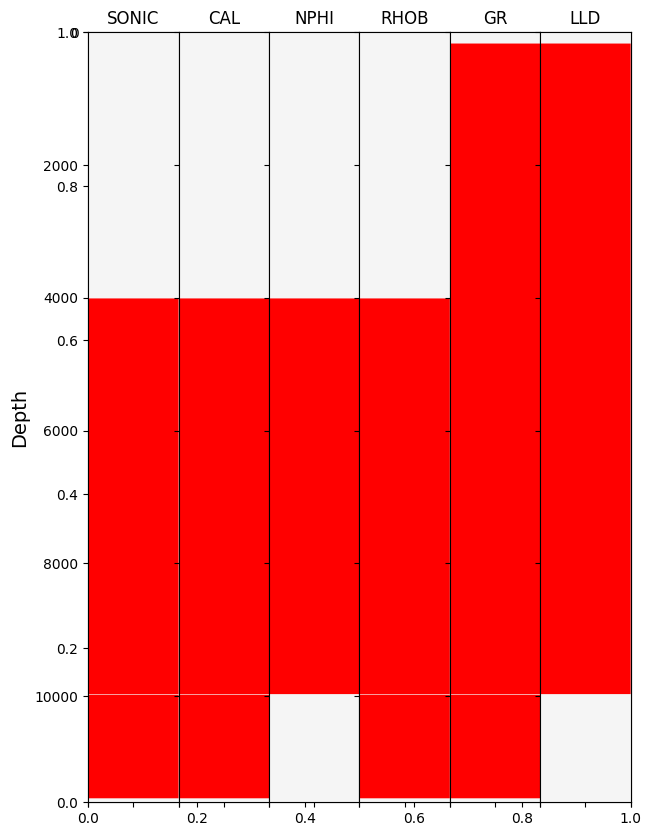

In [13]:
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,6), (0,5), rowspan=1, colspan = 1)


columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(11600, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)

## Plotting Log Data

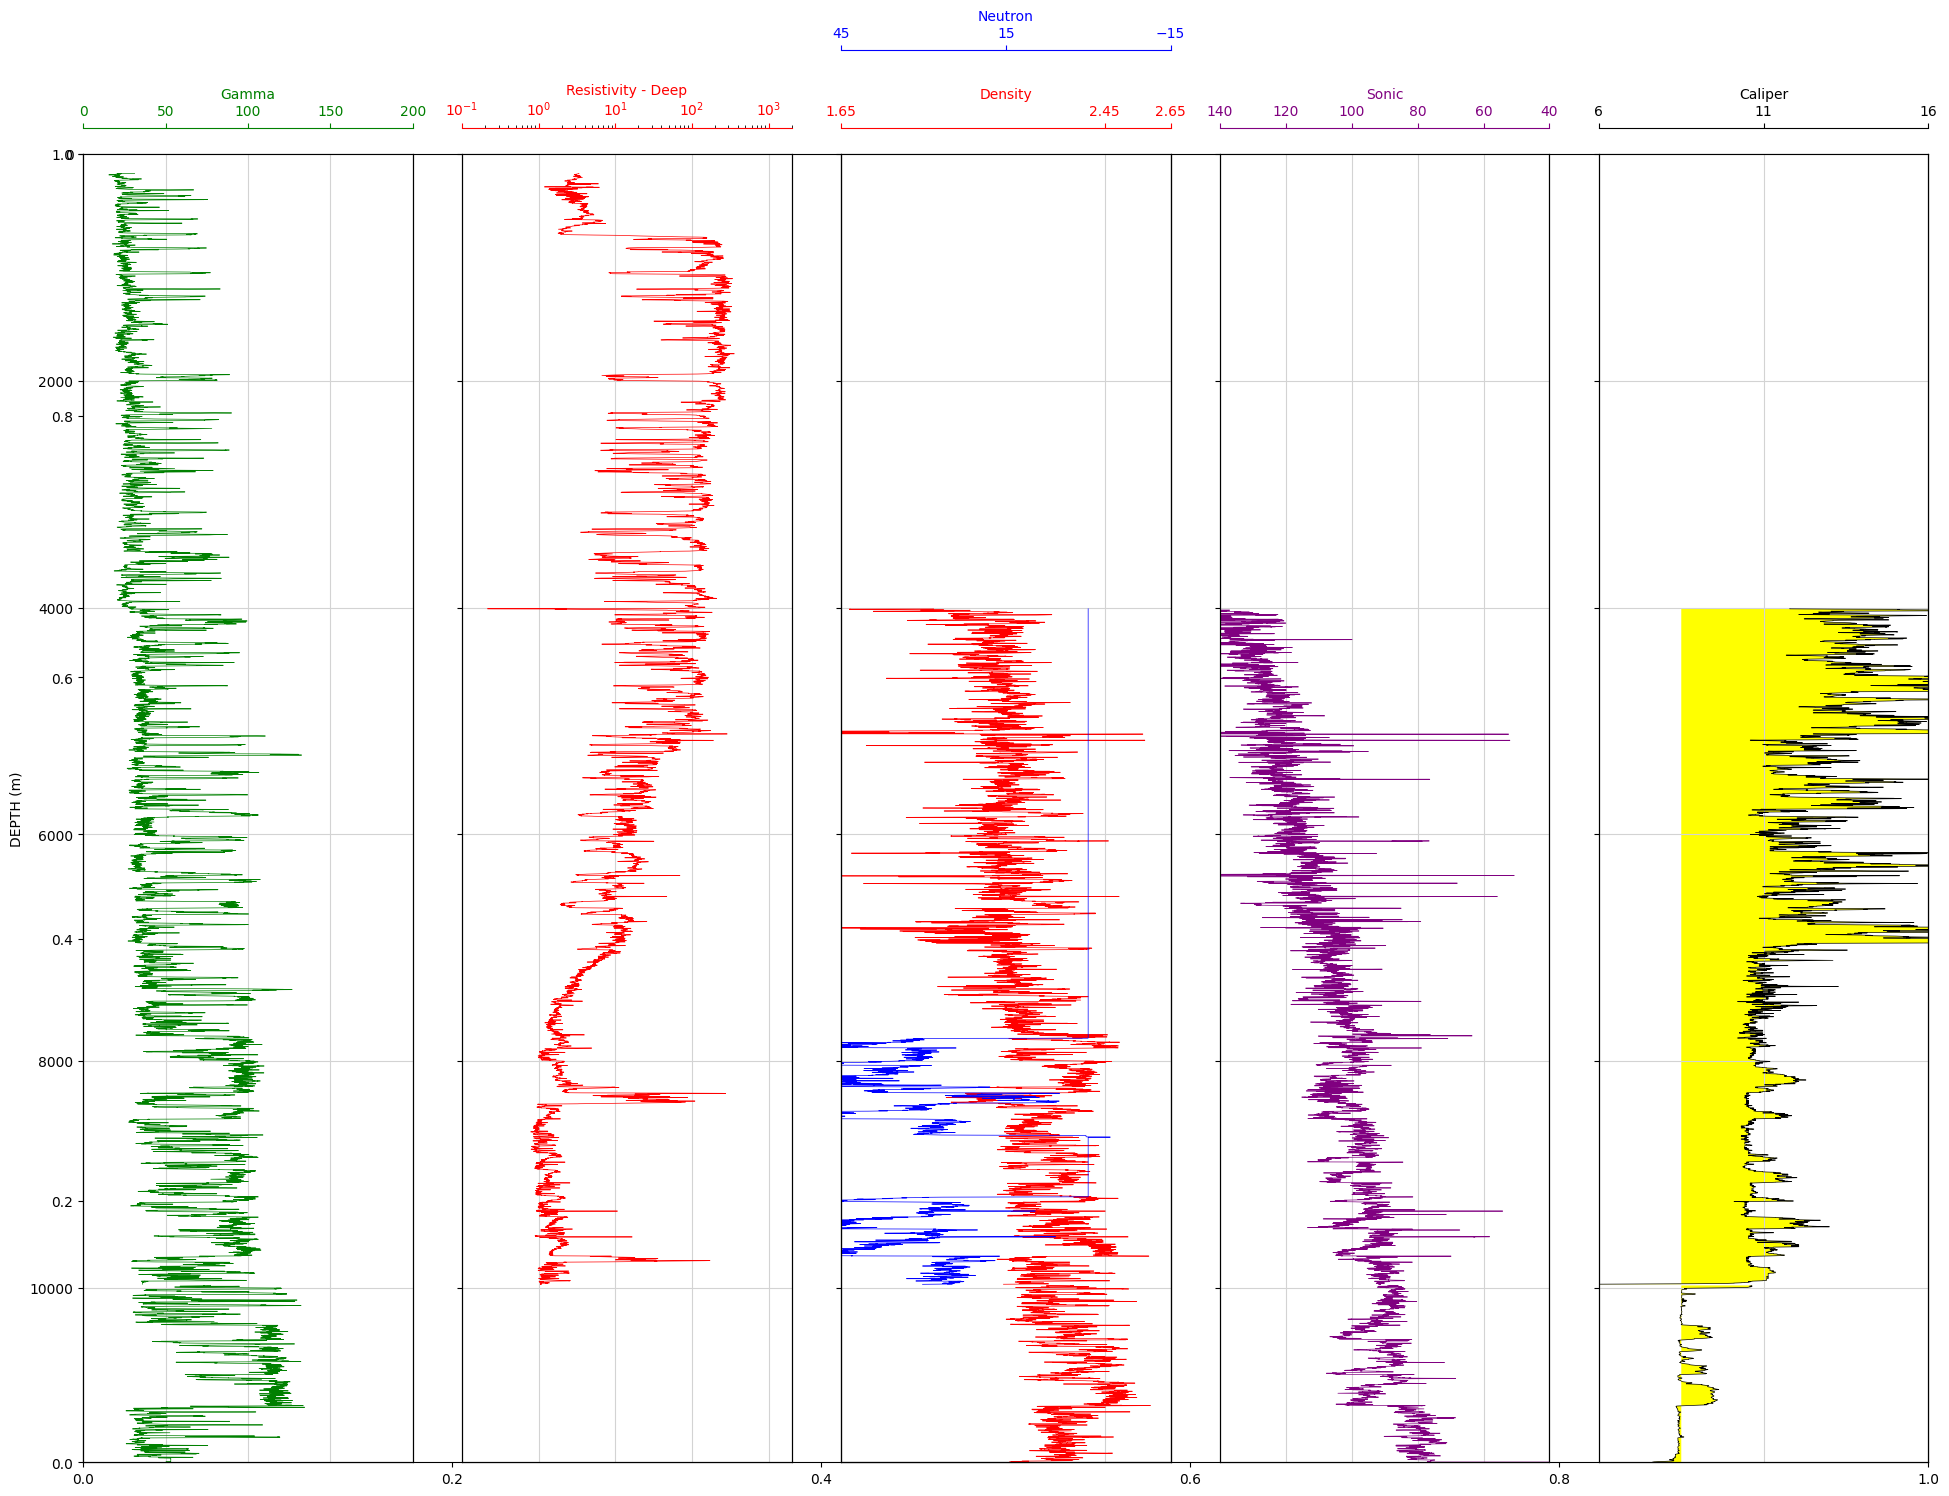

In [14]:
fig, ax = plt.subplots(figsize=(20,15))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1, sharey = ax1)


# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("DEPTH (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot(well["LLD"], well.index, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot(well["RHOB"], well.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.65, 2.45, 2.65])

# Sonic track
ax4.plot(well["SONIC"], well.index, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot(well["NPHI"], well.index, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(45, -15)
ax5.set_ylim(11540, 0)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([45,  15, -15])

# Caliper track
ax6.plot(well["CAL"], well.index, color = "black", linewidth = 0.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(6, 16)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.fill_betweenx(well_nan.index, 8.5, well["CAL"], facecolor='yellow')
ax6.set_xticks([6,  11, 16])



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.set_ylim(11540, 0)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
for ax in [ax2, ax3, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)

## Loading Multiple Log LAS

In [15]:
import lasio
import pandas as pd
import os

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
las_file_list = []
path = "Desktop/REX LOGS/"

In [23]:
files = os.listdir(path)
files

['REX-1.las',
 'REX-10.las',
 'REX-2.las',
 'REX-3.las',
 'REX-4.las',
 'REX-5.las',
 'REX-6.las',
 'REX-7.las',
 'REX-8.las',
 'REX-9.las']

In [24]:
#reading the las files; how to select only the LAS files
for file in files:
    if file.lower().endswith('.las'):
        las_file_list.append(path + file)
        
las_file_list

['Desktop/REX LOGS/REX-1.las',
 'Desktop/REX LOGS/REX-10.las',
 'Desktop/REX LOGS/REX-2.las',
 'Desktop/REX LOGS/REX-3.las',
 'Desktop/REX LOGS/REX-4.las',
 'Desktop/REX LOGS/REX-5.las',
 'Desktop/REX LOGS/REX-6.las',
 'Desktop/REX LOGS/REX-7.las',
 'Desktop/REX LOGS/REX-8.las',
 'Desktop/REX LOGS/REX-9.las']

## Appending the LAS files to a Dataframe

In [25]:
df_list = []

for lasfile in las_file_list:
    las = lasio.read(lasfile)
    lasdf = las.df()
    
    lasdf['WELL'] = las.well.WELL.value
    lasdf['DEPTH'] = lasdf.index
    df_list.append(lasdf)

In [26]:
workingdf = pd.concat(df_list, sort=True)

In [28]:
workingdf

CAL    DEPTH        GR  LL9S  LLD    NPHI  POR    RHOB    SONIC  \
DEPTH                                                                      
0.0      NaN      0.0       NaN   NaN  NaN     NaN  NaN     NaN      NaN   
0.5      NaN      0.5       NaN   NaN  NaN     NaN  NaN     NaN      NaN   
1.0      NaN      1.0       NaN   NaN  NaN     NaN  NaN     NaN      NaN   
1.5      NaN      1.5       NaN   NaN  NaN     NaN  NaN     NaN      NaN   
2.0      NaN      2.0       NaN   NaN  NaN     NaN  NaN     NaN      NaN   
...      ...      ...       ...   ...  ...     ...  ...     ...      ...   
11398.0  NaN  11398.0  183.8156   NaN  NaN  0.1761  NaN  2.0447  98.0756   
11398.5  NaN  11398.5  183.8156   NaN  NaN  0.1761  NaN  2.0447  98.2908   
11399.0  NaN  11399.0  183.8156   NaN  NaN  0.1761  NaN  2.0447  98.2231   
11399.5  NaN  11399.5  183.8156   NaN  NaN  0.1761  NaN  2.0447  98.4526   
11400.0  NaN  11400.0  183.8156   NaN  NaN  0.1761  NaN  2.0447  97.8167   

                  WELL  
DEPTH                   
0.0          AKASO-001  
0.5          AKASO-001  
1.0          AKASO-001  
1.5          AKASO-001  
2.0          AKASO-001  
...                ...  
11398.0  AKASO-012-ST1  
11398.5  AKASO-012-ST1  
11399.0  AKASO-012-ST1  
11399.5  AKASO-012-ST1  
11400.0  AKASO-012-ST1  

[201795 rows x 10 columns]

In [29]:
workingdf['WELL'].unique()

array(['AKASO-001', 'AKASO-013', 'AKASO-002', 'AKASO-003', 'AKASO-004',
       'AKASO-007', 'AKASO-008', 'AKASO-009', 'AKASO-010',
       'AKASO-012-ST1'], dtype=object)

In [30]:
grouped = workingdf.groupby('WELL')

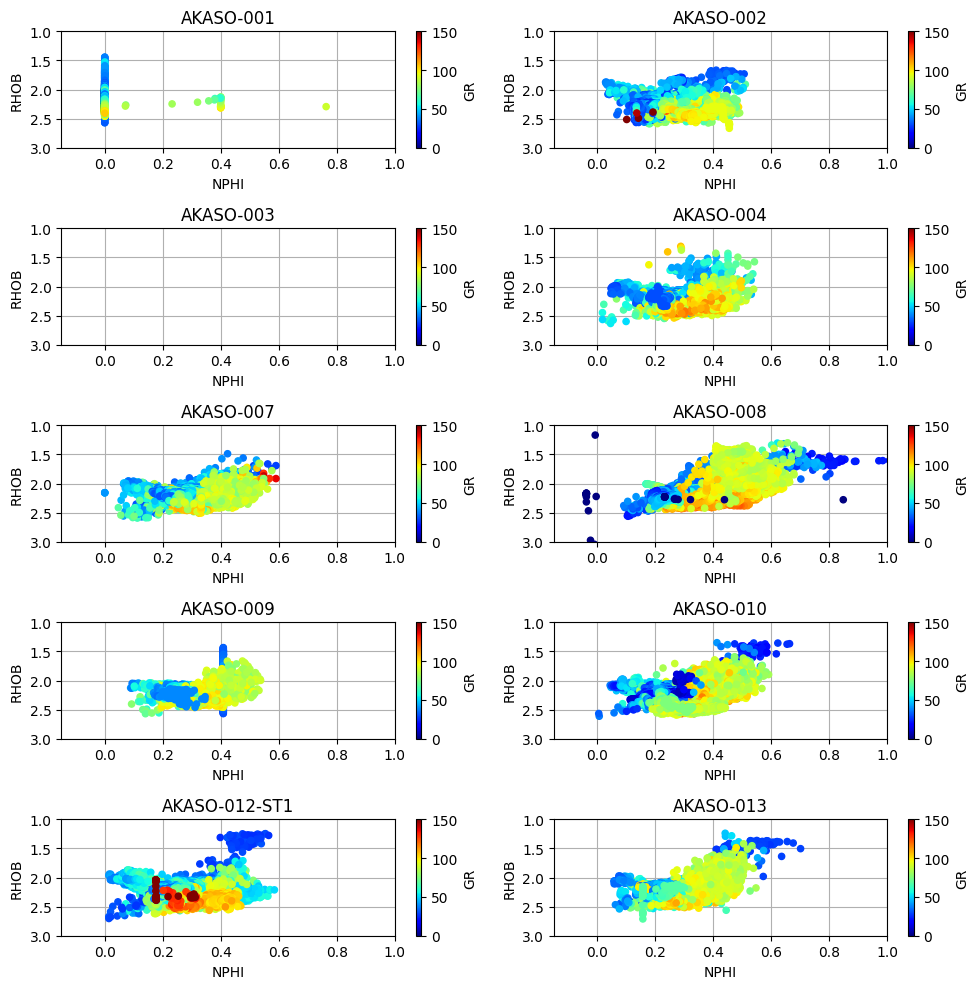

In [37]:
#Crossplot / Scatterplots Per Well¶
fig, axs = plt.subplots(5, 2, figsize=(10,10))

for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='GR', cmap='jet', vmin=0, vmax=150)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
    ax.grid(True)
    ax.set_axisbelow(True)
plt.tight_layout()

In [43]:
print(workingdf.index.is_unique)

# Output: False

False


In [44]:
print(workingdf.index.duplicated())

# Output:
# [False  True False False]

[False False False ...  True  True  True]


In [46]:
# Reset Index

workingdf_2 = workingdf.reset_index(drop=True)

In [48]:
print(workingdf_2.index.is_unique)

True


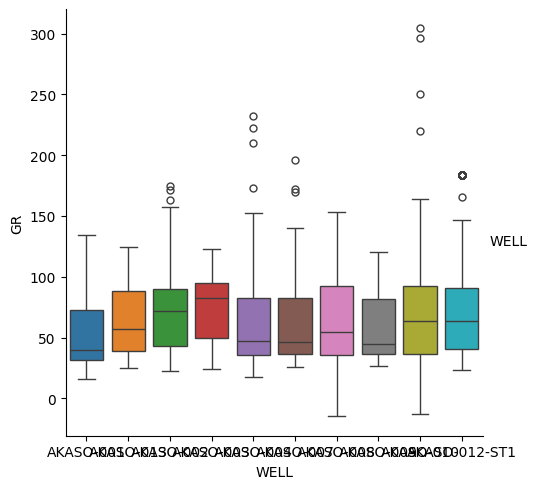

In [49]:
# Boxplot of Gamma Ray Per Well¶
sns.catplot(x='WELL', y='GR', hue='WELL', data=workingdf_2, kind='box')

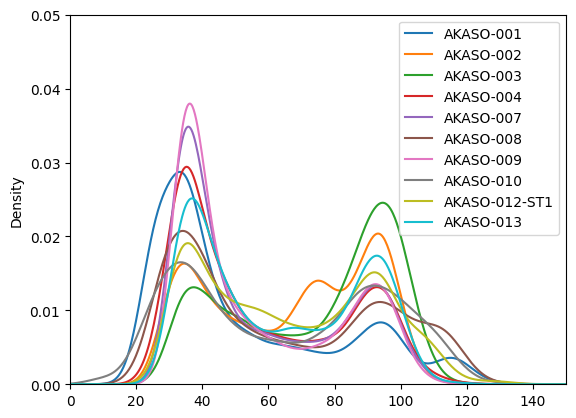

In [50]:
#Histogram (Kernel Density Estimate)
workingdf_2.groupby('WELL').GR.plot(kind='kde')
plt.xlim(0,150)
plt.ylim(0, 0.05) #ylim upper may change depending on data
plt.legend()

In [51]:
workingdf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201795 entries, 0 to 201794
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CAL     116484 non-null  float64
 1   DEPTH   201795 non-null  float64
 2   GR      148383 non-null  float64
 3   LL9S    52023 non-null   float64
 4   LLD     124924 non-null  float64
 5   NPHI    127669 non-null  float64
 6   POR     12960 non-null   float64
 7   RHOB    136747 non-null  float64
 8   SONIC   92613 non-null   float64
 9   WELL    201795 non-null  object 
dtypes: float64(9), object(1)
memory usage: 15.4+ MB


In [54]:
workingdf_2.to_csv('REX_WELL.csv', index=False)